In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [6]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-1, 1),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

Using TensorFlow backend.


In [7]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 2000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 571us/step - loss: 0.9278 - acc: 0.4747 - val_loss: 0.7555 - val_acc: 0.6316
Epoch 2/1000
455/455 [==============================] - 0s 159us/step - loss: 0.6619 - acc: 0.6484 - val_loss: 0.5964 - val_acc: 0.7368
Epoch 3/1000
455/455 [==============================] - 0s 122us/step - loss: 0.5685 - acc: 0.6725 - val_loss: 0.5250 - val_acc: 0.7281
Epoch 4/1000
455/455 [==============================] - 0s 107us/step - loss: 0.5135 - acc: 0.8154 - val_loss: 0.4766 - val_acc: 0.8509
Epoch 5/1000
455/455 [==============================] - 0s 111us/step - loss: 0.4722 - acc: 0.8527 - val_loss: 0.4411 - val_acc: 0.8772
Epoch 6/1000
455/455 [==============================] - 0s 107us/step - loss: 0.4417 - acc: 0.8615 - val_loss: 0.4137 - val_acc: 0.8947
Epoch 7/1000
455/455 [==============================] - 0s 99us/step - loss: 0.4183 - acc: 0.9033 - val_loss: 0.3909 - val_acc: 0.9035
Epo

455/455 [==============================] - 0s 97us/step - loss: 0.2159 - acc: 0.9143 - val_loss: 0.2217 - val_acc: 0.9211
Epoch 61/1000
455/455 [==============================] - 0s 84us/step - loss: 0.2150 - acc: 0.9143 - val_loss: 0.2224 - val_acc: 0.9211
Epoch 62/1000
455/455 [==============================] - 0s 74us/step - loss: 0.2136 - acc: 0.9143 - val_loss: 0.2216 - val_acc: 0.9211
Epoch 63/1000
455/455 [==============================] - 0s 173us/step - loss: 0.2126 - acc: 0.9165 - val_loss: 0.2231 - val_acc: 0.9211
Epoch 64/1000
455/455 [==============================] - 0s 133us/step - loss: 0.2130 - acc: 0.9165 - val_loss: 0.2213 - val_acc: 0.9211
Epoch 65/1000
455/455 [==============================] - 0s 125us/step - loss: 0.2117 - acc: 0.9143 - val_loss: 0.2207 - val_acc: 0.9211
Epoch 66/1000
455/455 [==============================] - 0s 135us/step - loss: 0.2117 - acc: 0.9165 - val_loss: 0.2210 - val_acc: 0.9211
Epoch 67/1000
455/455 [==============================] - 0

Epoch 120/1000
455/455 [==============================] - 0s 118us/step - loss: 0.1852 - acc: 0.9253 - val_loss: 0.2052 - val_acc: 0.9123
Epoch 121/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1847 - acc: 0.9231 - val_loss: 0.2052 - val_acc: 0.9123
Epoch 122/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1842 - acc: 0.9253 - val_loss: 0.2030 - val_acc: 0.9211
Epoch 123/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1850 - acc: 0.9297 - val_loss: 0.2025 - val_acc: 0.9211
Epoch 124/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1842 - acc: 0.9253 - val_loss: 0.2039 - val_acc: 0.9211
Epoch 125/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1836 - acc: 0.9253 - val_loss: 0.2053 - val_acc: 0.9123
Epoch 126/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1837 - acc: 0.9253 - val_loss: 0.2053 - val_acc: 0.9123
Epoch 127/1000
455/455 [================

Epoch 180/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1706 - acc: 0.9341 - val_loss: 0.1944 - val_acc: 0.9123
Epoch 181/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1709 - acc: 0.9275 - val_loss: 0.1954 - val_acc: 0.9123
Epoch 182/1000
455/455 [==============================] - 0s 72us/step - loss: 0.1698 - acc: 0.9363 - val_loss: 0.1933 - val_acc: 0.9211
Epoch 183/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1700 - acc: 0.9319 - val_loss: 0.1951 - val_acc: 0.9123
Epoch 184/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1695 - acc: 0.9297 - val_loss: 0.1940 - val_acc: 0.9123
Epoch 185/1000
455/455 [==============================] - 0s 73us/step - loss: 0.1697 - acc: 0.9341 - val_loss: 0.1939 - val_acc: 0.9123
Epoch 186/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1690 - acc: 0.9275 - val_loss: 0.1956 - val_acc: 0.9123
Epoch 187/1000
455/455 [=================

455/455 [==============================] - 0s 94us/step - loss: 0.1622 - acc: 0.9341 - val_loss: 0.1926 - val_acc: 0.9123
Epoch 240/1000
455/455 [==============================] - 0s 110us/step - loss: 0.1625 - acc: 0.9297 - val_loss: 0.1908 - val_acc: 0.9123
Epoch 241/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1627 - acc: 0.9341 - val_loss: 0.1890 - val_acc: 0.9211
Epoch 242/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1615 - acc: 0.9297 - val_loss: 0.1902 - val_acc: 0.9123
Epoch 243/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1635 - acc: 0.9297 - val_loss: 0.1907 - val_acc: 0.9123
Epoch 244/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1634 - acc: 0.9319 - val_loss: 0.1884 - val_acc: 0.9211
Epoch 245/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1615 - acc: 0.9319 - val_loss: 0.1892 - val_acc: 0.9211
Epoch 246/1000
455/455 [==============================]

Epoch 299/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1569 - acc: 0.9319 - val_loss: 0.1895 - val_acc: 0.9123
Epoch 300/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1567 - acc: 0.9363 - val_loss: 0.1871 - val_acc: 0.9211
Epoch 301/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1579 - acc: 0.9385 - val_loss: 0.1873 - val_acc: 0.9211
Epoch 302/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1566 - acc: 0.9341 - val_loss: 0.1897 - val_acc: 0.9123
Epoch 303/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1562 - acc: 0.9341 - val_loss: 0.1881 - val_acc: 0.9211
Epoch 304/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1567 - acc: 0.9319 - val_loss: 0.1890 - val_acc: 0.9123
Epoch 305/1000
455/455 [==============================] - 0s 105us/step - loss: 0.1567 - acc: 0.9341 - val_loss: 0.1881 - val_acc: 0.9123
Epoch 306/1000
455/455 [================

Epoch 359/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1540 - acc: 0.9341 - val_loss: 0.1870 - val_acc: 0.9211
Epoch 360/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1533 - acc: 0.9385 - val_loss: 0.1857 - val_acc: 0.9298
Epoch 361/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1536 - acc: 0.9363 - val_loss: 0.1866 - val_acc: 0.9211
Epoch 362/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1528 - acc: 0.9341 - val_loss: 0.1918 - val_acc: 0.9035
Epoch 363/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1536 - acc: 0.9319 - val_loss: 0.1876 - val_acc: 0.9211
Epoch 364/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1543 - acc: 0.9341 - val_loss: 0.1875 - val_acc: 0.9123
Epoch 365/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1533 - acc: 0.9341 - val_loss: 0.1898 - val_acc: 0.9123
Epoch 366/1000
455/455 [=================

455/455 [==============================] - 0s 80us/step - loss: 0.1499 - acc: 0.9385 - val_loss: 0.1840 - val_acc: 0.9211
Epoch 419/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1492 - acc: 0.9363 - val_loss: 0.1864 - val_acc: 0.9211
Epoch 420/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1506 - acc: 0.9341 - val_loss: 0.1866 - val_acc: 0.9211
Epoch 421/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1487 - acc: 0.9341 - val_loss: 0.1848 - val_acc: 0.9211
Epoch 422/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1494 - acc: 0.9363 - val_loss: 0.1847 - val_acc: 0.9211
Epoch 423/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1493 - acc: 0.9363 - val_loss: 0.1863 - val_acc: 0.9211
Epoch 424/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1492 - acc: 0.9319 - val_loss: 0.1853 - val_acc: 0.9211
Epoch 425/1000
455/455 [==============================] 

Epoch 478/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1462 - acc: 0.9363 - val_loss: 0.1839 - val_acc: 0.9211
Epoch 479/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1457 - acc: 0.9341 - val_loss: 0.1848 - val_acc: 0.9211
Epoch 480/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1457 - acc: 0.9319 - val_loss: 0.1843 - val_acc: 0.9211
Epoch 481/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1463 - acc: 0.9341 - val_loss: 0.1836 - val_acc: 0.9211
Epoch 482/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1466 - acc: 0.9363 - val_loss: 0.1831 - val_acc: 0.9211
Epoch 483/1000
455/455 [==============================] - 0s 67us/step - loss: 0.1457 - acc: 0.9319 - val_loss: 0.1853 - val_acc: 0.9123
Epoch 484/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1469 - acc: 0.9319 - val_loss: 0.1837 - val_acc: 0.9211
Epoch 485/1000
455/455 [=================

Epoch 538/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1432 - acc: 0.9385 - val_loss: 0.1783 - val_acc: 0.9211
Epoch 539/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1431 - acc: 0.9363 - val_loss: 0.1801 - val_acc: 0.9211
Epoch 540/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1429 - acc: 0.9341 - val_loss: 0.1803 - val_acc: 0.9211
Epoch 541/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1433 - acc: 0.9363 - val_loss: 0.1801 - val_acc: 0.9211
Epoch 542/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1434 - acc: 0.9341 - val_loss: 0.1812 - val_acc: 0.9211
Epoch 543/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1425 - acc: 0.9341 - val_loss: 0.1807 - val_acc: 0.9211
Epoch 544/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1434 - acc: 0.9363 - val_loss: 0.1801 - val_acc: 0.9211
Epoch 545/1000
455/455 [=================

Epoch 598/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1408 - acc: 0.9363 - val_loss: 0.1851 - val_acc: 0.9211
Epoch 599/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1421 - acc: 0.9341 - val_loss: 0.1868 - val_acc: 0.9123
Epoch 600/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1412 - acc: 0.9363 - val_loss: 0.1813 - val_acc: 0.9211
Epoch 601/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1424 - acc: 0.9363 - val_loss: 0.1793 - val_acc: 0.9211
Epoch 602/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1407 - acc: 0.9363 - val_loss: 0.1835 - val_acc: 0.9211
Epoch 603/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1409 - acc: 0.9341 - val_loss: 0.1819 - val_acc: 0.9211
Epoch 604/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1400 - acc: 0.9341 - val_loss: 0.1837 - val_acc: 0.9211
Epoch 605/1000
455/455 [===============

Epoch 658/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1377 - acc: 0.9363 - val_loss: 0.1792 - val_acc: 0.9211
Epoch 659/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1370 - acc: 0.9385 - val_loss: 0.1804 - val_acc: 0.9211
Epoch 660/1000
455/455 [==============================] - 0s 102us/step - loss: 0.1385 - acc: 0.9385 - val_loss: 0.1794 - val_acc: 0.9211
Epoch 661/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1369 - acc: 0.9363 - val_loss: 0.1790 - val_acc: 0.9211
Epoch 662/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1391 - acc: 0.9385 - val_loss: 0.1792 - val_acc: 0.9211
Epoch 663/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1382 - acc: 0.9363 - val_loss: 0.1779 - val_acc: 0.9211
Epoch 664/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1380 - acc: 0.9363 - val_loss: 0.1791 - val_acc: 0.9211
Epoch 665/1000
455/455 [================

455/455 [==============================] - 0s 98us/step - loss: 0.1353 - acc: 0.9363 - val_loss: 0.1788 - val_acc: 0.9211
Epoch 718/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1359 - acc: 0.9363 - val_loss: 0.1797 - val_acc: 0.9211
Epoch 719/1000
455/455 [==============================] - 0s 105us/step - loss: 0.1352 - acc: 0.9363 - val_loss: 0.1767 - val_acc: 0.9211
Epoch 720/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1357 - acc: 0.9363 - val_loss: 0.1779 - val_acc: 0.9123
Epoch 721/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1356 - acc: 0.9363 - val_loss: 0.1789 - val_acc: 0.9211
Epoch 722/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1351 - acc: 0.9341 - val_loss: 0.1795 - val_acc: 0.9211
Epoch 723/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1352 - acc: 0.9363 - val_loss: 0.1783 - val_acc: 0.9211
Epoch 724/1000
455/455 [==============================]

Epoch 777/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1331 - acc: 0.9385 - val_loss: 0.1782 - val_acc: 0.9211
Epoch 778/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1333 - acc: 0.9385 - val_loss: 0.1791 - val_acc: 0.9211
Epoch 779/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1332 - acc: 0.9363 - val_loss: 0.1786 - val_acc: 0.9211
Epoch 780/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1330 - acc: 0.9385 - val_loss: 0.1779 - val_acc: 0.9211
Epoch 781/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1327 - acc: 0.9363 - val_loss: 0.1785 - val_acc: 0.9211
Epoch 782/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1328 - acc: 0.9363 - val_loss: 0.1789 - val_acc: 0.9211
Epoch 783/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1328 - acc: 0.9363 - val_loss: 0.1784 - val_acc: 0.9211
Epoch 784/1000
455/455 [================

Epoch 837/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1324 - acc: 0.9341 - val_loss: 0.1771 - val_acc: 0.9211
Epoch 838/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1333 - acc: 0.9363 - val_loss: 0.1762 - val_acc: 0.9211
Epoch 839/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1316 - acc: 0.9363 - val_loss: 0.1788 - val_acc: 0.9211
Epoch 840/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1314 - acc: 0.9363 - val_loss: 0.1757 - val_acc: 0.9298
Epoch 841/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1319 - acc: 0.9363 - val_loss: 0.1779 - val_acc: 0.9211
Epoch 842/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1321 - acc: 0.9385 - val_loss: 0.1777 - val_acc: 0.9211
Epoch 843/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1319 - acc: 0.9363 - val_loss: 0.1769 - val_acc: 0.9211
Epoch 844/1000
455/455 [=================

Epoch 897/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1290 - acc: 0.9385 - val_loss: 0.1748 - val_acc: 0.9298
Epoch 898/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1306 - acc: 0.9363 - val_loss: 0.1749 - val_acc: 0.9298
Epoch 899/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1299 - acc: 0.9363 - val_loss: 0.1786 - val_acc: 0.9211
Epoch 900/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1300 - acc: 0.9363 - val_loss: 0.1792 - val_acc: 0.9211
Epoch 901/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1303 - acc: 0.9385 - val_loss: 0.1769 - val_acc: 0.9211
Epoch 902/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1307 - acc: 0.9363 - val_loss: 0.1739 - val_acc: 0.9211
Epoch 903/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1298 - acc: 0.9341 - val_loss: 0.1750 - val_acc: 0.9211
Epoch 904/1000
455/455 [=================

Epoch 957/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1274 - acc: 0.9385 - val_loss: 0.1760 - val_acc: 0.9211
Epoch 958/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1276 - acc: 0.9385 - val_loss: 0.1761 - val_acc: 0.9298
Epoch 959/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1274 - acc: 0.9363 - val_loss: 0.1778 - val_acc: 0.9211
Epoch 960/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1272 - acc: 0.9407 - val_loss: 0.1775 - val_acc: 0.9211
Epoch 961/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1278 - acc: 0.9407 - val_loss: 0.1769 - val_acc: 0.9298
Epoch 962/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1279 - acc: 0.9385 - val_loss: 0.1762 - val_acc: 0.9211
Epoch 963/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1268 - acc: 0.9385 - val_loss: 0.1766 - val_acc: 0.9211
Epoch 964/1000
455/455 [================

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.947
best validation accuracy: 0.939


# Weight analysis

In [10]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return np.sum(abs(l) >= 0) - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(200)

# Graphics

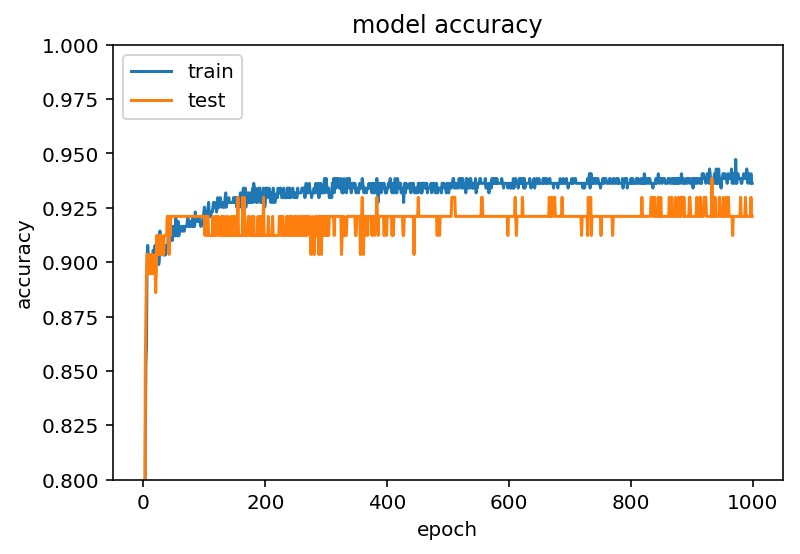

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

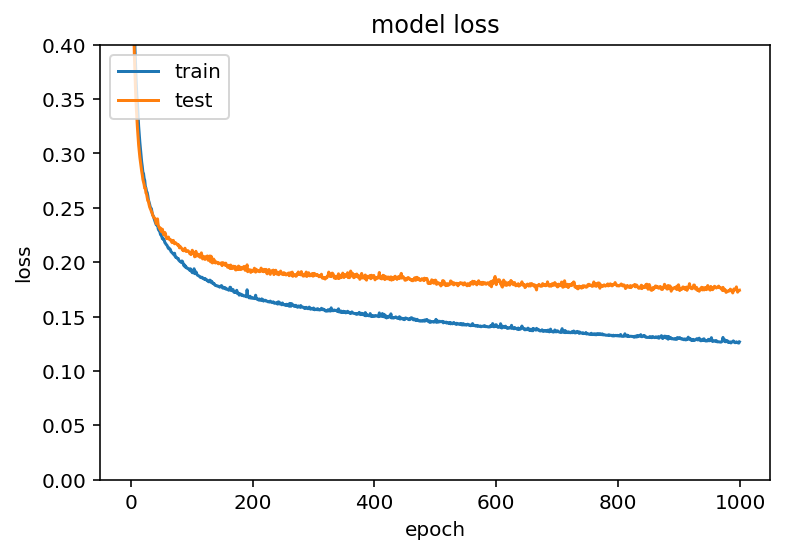

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.0, 0.4])
plt.show()

In [13]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

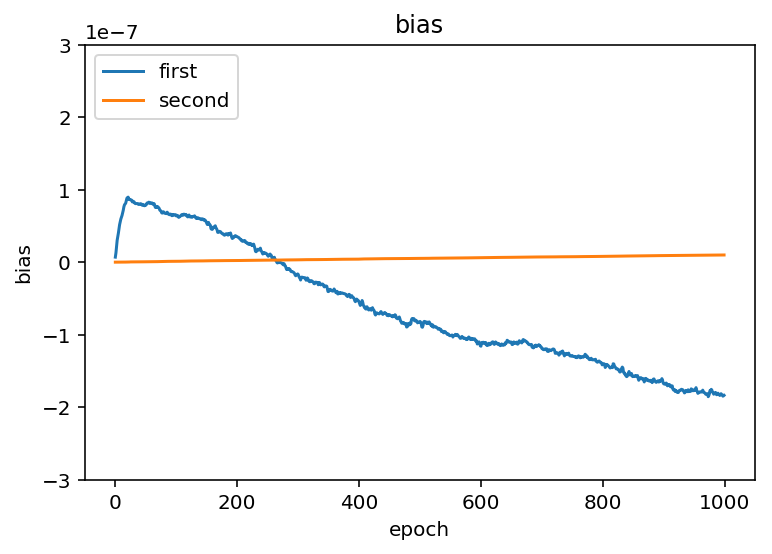

In [23]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
plt.ylim([-3e-7, 3e-7])
plt.show()

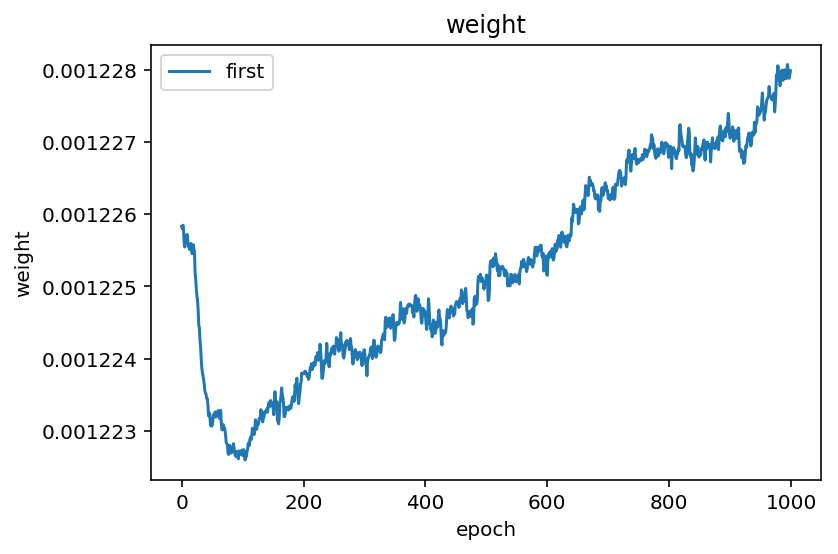

In [15]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

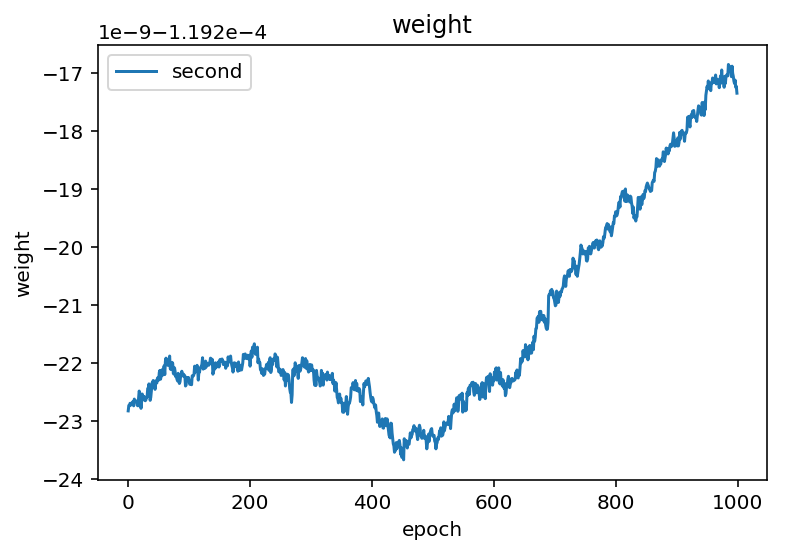

In [16]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

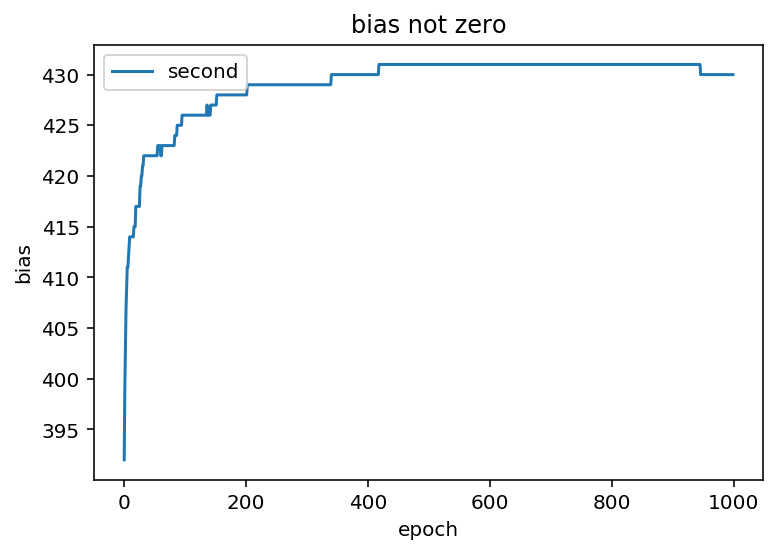

In [17]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

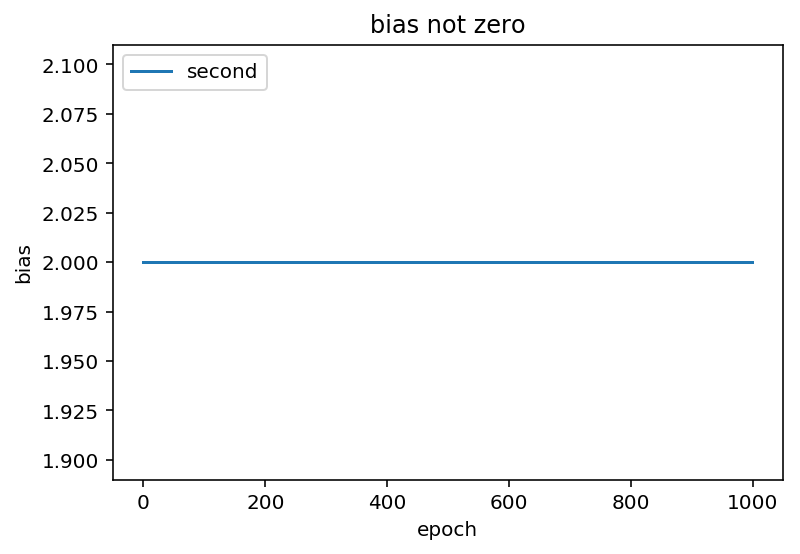

In [18]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

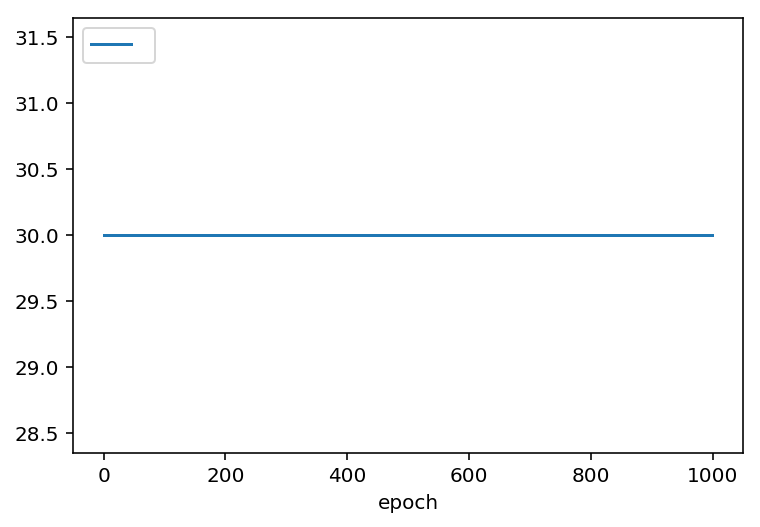

In [19]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

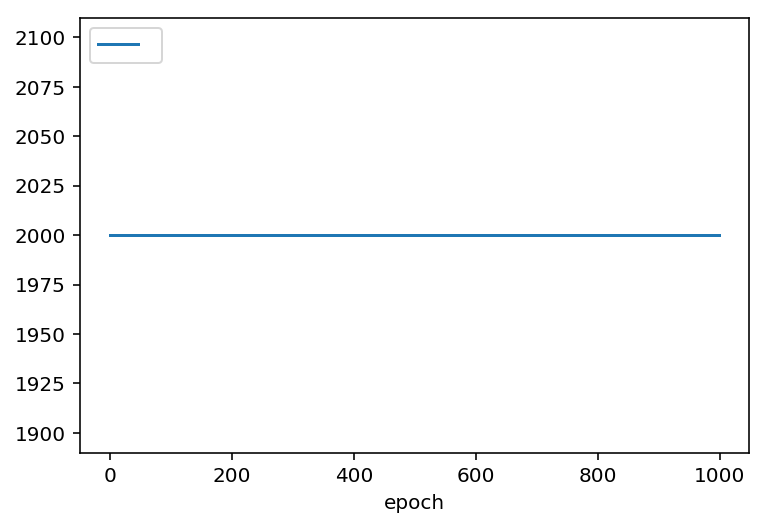

In [20]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

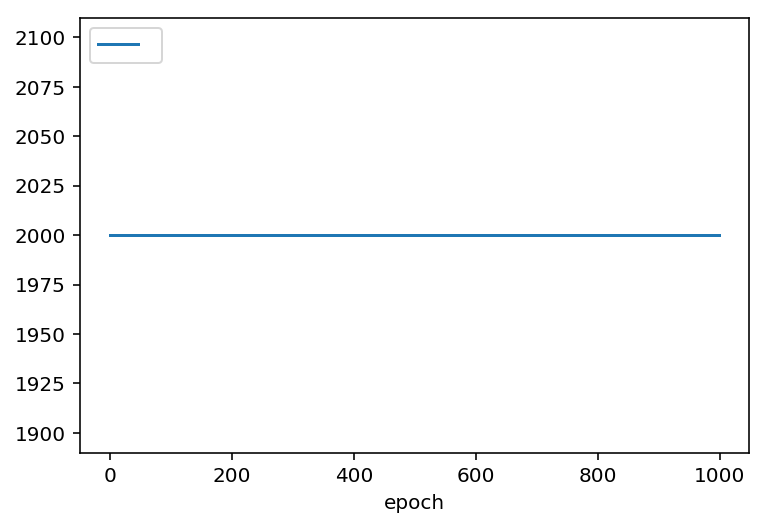

In [21]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

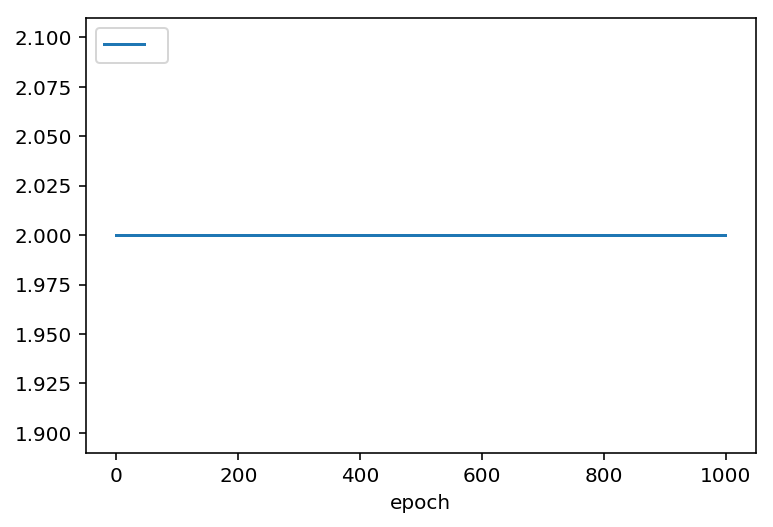

In [22]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()